In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


##Importing Libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

###

In [ ]:
# df = pd.read_csv('/content/drive/MyDrive/block_5.csv')
df = pd.read_csv('MAC000002.csv')

###Dropping Irrelavent Columns

In [ ]:
df = df.drop(['LCLid' , 'energy_median', 'energy_mean' , 'energy_max' , 'energy_count', 'energy_std','energy_min'], axis = 'columns' )

In [ ]:
df.set_index('day')

,energy_sum
day,
2012-10-12,7.098
2012-10-13,11.087
2012-10-14,13.223
2012-10-15,10.257
2012-10-16,9.769
...,...
2014-02-24,12.528
2014-02-25,11.826
2014-02-26,12.328


In [ ]:
# df = df[df['day'] >'2012-12-31'] (for making csv files for the year 2013)

In [ ]:
# df = df[df['day'] <'2014-01-01'] ^^

In [ ]:
df.set_index('day')

,energy_sum
day,
2013-01-01,10.800
2013-01-02,13.300
2013-01-03,10.074
2013-01-04,9.857
2013-01-05,11.171
...,...
2013-12-27,9.122
2013-12-28,13.658
2013-12-29,14.982


In [ ]:
indexed = df.set_index('day')

In [ ]:
df['ds'] = pd.to_datetime(df['day'])
df['y'] = pd.to_numeric(df['energy_sum'], downcast='float',errors='coerce')
data = df[['ds','y']]

In [ ]:
data

,ds,y
0,2012-10-12,7.098
1,2012-10-13,11.087
2,2012-10-14,13.223
3,2012-10-15,10.257
4,2012-10-16,9.769
...,...,...
500,2014-02-24,12.528
501,2014-02-25,11.826
502,2014-02-26,12.328
503,2014-02-27,20.518


In [ ]:
indexed = data.set_index('ds')

In [ ]:
daily = indexed.resample('D').sum()

In [ ]:
daily

,y
ds,
2012-10-12,7.098
2012-10-13,11.087
2012-10-14,13.223
2012-10-15,10.257
2012-10-16,9.769
...,...
2014-02-24,12.528
2014-02-25,11.826
2014-02-26,12.328


In [ ]:
df2 = daily

In [ ]:
df2.reset_index(inplace = True)

In [ ]:
df2

,ds,y
0,2012-10-12,7.098
1,2012-10-13,11.087
2,2012-10-14,13.223
3,2012-10-15,10.257
4,2012-10-16,9.769
...,...,...
500,2014-02-24,12.528
501,2014-02-25,11.826
502,2014-02-26,12.328
503,2014-02-27,20.518


###Importing Prophet Model

In [ ]:
import fbprophet
df2_prophet = fbprophet.Prophet(changepoint_prior_scale= 0.1)
df2_prophet.fit(df2)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
df2.describe()

,y
count,505.000000
mean,12.070636
std,4.494517
min,0.186000
25%,9.379000
50%,11.214000
75%,13.780000
max,39.284000


###Getting the predictions for 2 months

In [ ]:
df2_forecast = df2_prophet.make_future_dataframe(periods = 30*2, freq = 'D')
df2_forecast = df2_prophet.predict(df2_forecast)

###Graph with 2 months predictions

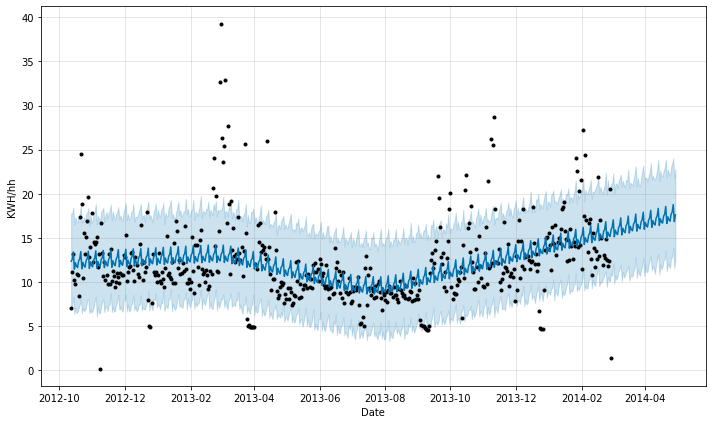

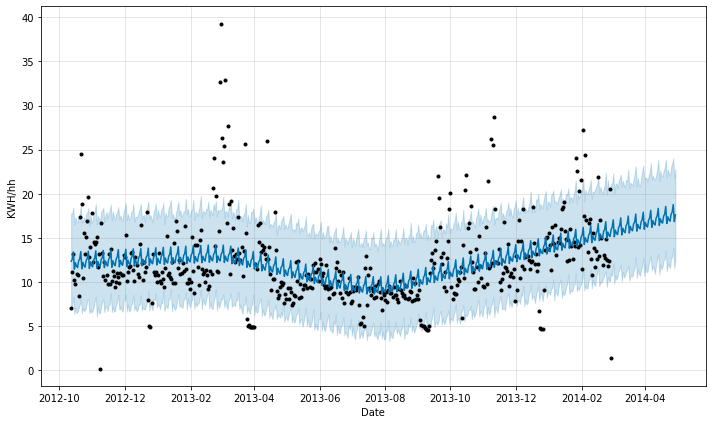

In [ ]:
df2_prophet.plot(df2_forecast, xlabel='Date', ylabel='KWH/hh')

In [ ]:
df2_forecast.head() 

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2012-10-12,12.181538,6.900022,17.765929,12.181538,12.181538,0.170122,0.170122,0.170122,0.170122,0.170122,0.170122,0.0,0.0,0.0,12.351660
1,2012-10-13,12.187704,7.491611,17.726653,12.187704,12.187704,0.391245,0.391245,0.391245,0.391245,0.391245,0.391245,0.0,0.0,0.0,12.578949
2,2012-10-14,12.193869,8.316394,18.418591,12.193869,12.193869,1.212060,1.212060,1.212060,1.212060,1.212060,1.212060,0.0,0.0,0.0,13.405929
3,2012-10-15,12.200034,6.365057,16.499121,12.200034,12.200034,-0.748370,-0.748370,-0.748370,-0.748370,-0.748370,-0.748370,0.0,0.0,0.0,11.451664
4,2012-10-16,12.206199,7.135054,17.335479,12.206199,12.206199,-0.024415,-0.024415,-0.024415,-0.024415,-0.024415,-0.024415,0.0,0.0,0.0,12.181784


In [ ]:
values = df2_forecast[['ds','yhat']].tail(60)#printing the last 60 values (predicted values) which were appended onto the dataset

In [ ]:
values

,ds,yhat
505,2014-03-01,16.194902
506,2014-03-02,17.046578
507,2014-03-03,15.117009
508,2014-03-04,15.871824
509,2014-03-05,15.508664
510,2014-03-06,15.375754
511,2014-03-07,16.158943
512,2014-03-08,16.410927
513,2014-03-09,17.262603
514,2014-03-10,15.333033


In [ ]:
values.set_index('ds' , inplace = True)

In [ ]:
values#used this to make a .csv file for displaying the daily predicted values for the next 2 months in the dataset

,yhat
ds,
2014-03-01,16.194902
2014-03-02,17.046578
2014-03-03,15.117009
2014-03-04,15.871824
2014-03-05,15.508664
2014-03-06,15.375754
2014-03-07,16.158943
2014-03-08,16.410927
2014-03-09,17.262603


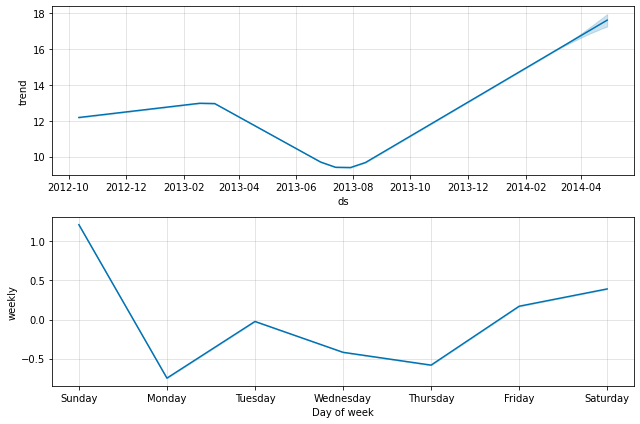

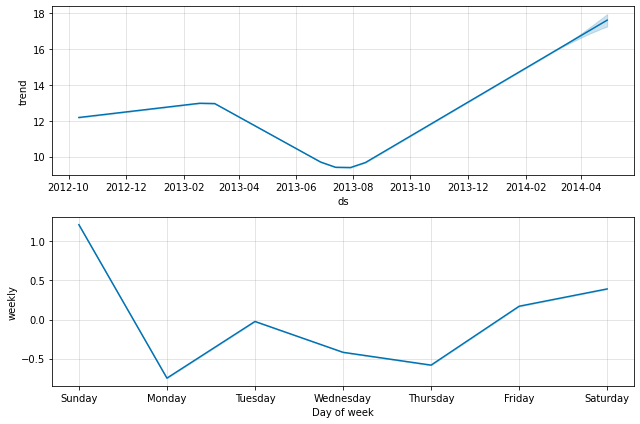

In [ ]:
df2_prophet.plot_components(df2_forecast)#describing the trends.